In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!ls '/content/drive/My Drive/ventimage'

Test  Train


In [11]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D

In [12]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
classifier.add(Flatten())
classifier.add(Dense(activation='relu', units=128))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [18]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
#train_datagen= ImageDataGenerator( rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_datagen= ImageDataGenerator( rescale=1./255)

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
training_set = train_datagen.flow_from_directory( '/content/drive/My Drive/ventimage/Train', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 1168 images belonging to 2 classes.


In [23]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/ventimage/Test', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 128 images belonging to 2 classes.


In [24]:
history=classifier.fit_generator(training_set, epochs=3, validation_data=test_set)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3
37/37 [==============================] - 1307s 35s/step - loss: 0.2778 - accuracy: 0.9675 - val_loss: 0.6683 - val_accuracy: 0.7500
Epoch 2/3
37/37 [==============================] - 241s 7s/step - loss: 0.0147 - accuracy: 0.9983 - val_loss: 0.1346 - val_accuracy: 0.9688
Epoch 3/3
37/37 [==============================] - 242s 7s/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.0892 - val_accuracy: 0.9609


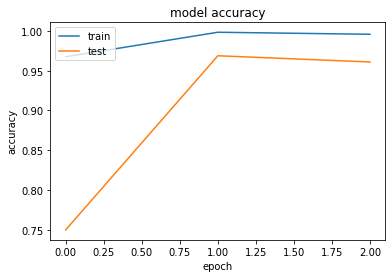

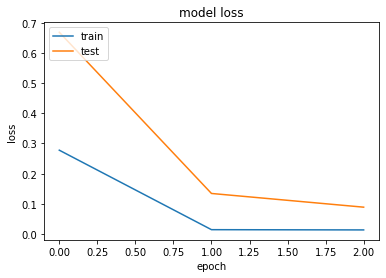

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
